<a href="https://colab.research.google.com/github/rk928/Ranjit-Kumar/blob/main/Copy_of_ENVS_617_Assignment_4_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4: Plotting

In this assignment, you'll be making plots looking at air quality in New Delhi, India between 2015 and 2020. In the process, we'll review some data wrangling and data QA.

In this assignment we'll be exploring two questions:

1. How does air quality vary over time in New Delhi? Are there seasonal patterns?
2. How does air quality vary with temperature?

# Data Documentation

## Air Quality Data
* We'll look at air quality data from AirNow. (AirNow is a partnership across many US federal agencies and is the US's official source for air quality data globally.)


* The AQI data we'll look at today is from the US embassy in New Delhi from the "Historical" tab at [this link](https://www.airnow.gov/international/us-embassies-and-consulates/#India$New_Delhi)

* The data includes hourly measures of particulate matter (PM2.5), as well as the associated [Air Quality Index](https://www.airnow.gov/aqi/aqi-basics/) (AQI) and Air Quality Index Category.


## Temperature Data
* Again this week we'll be working with Global Historical Climatology from [NOAA](https://www.ncdc.noaa.gov/cdo-web/search) - this time for daily air temperature in New Delhi.
* We've exported the 'Daily Summaries' data for New Delhi City in °F for 2015-2020.
* Menne, Matthew J., Imke Durre, Bryant Korzeniewski, Shelley McNeal, Kristy Thomas, Xungang Yin, Steven Anthony, Ron Ray, Russell S. Vose, Byron E.Gleason, and Tamara G. Houston (2012): Global Historical Climatology Network - Daily (GHCN-Daily), Version 3. NOAA National Climatic Data Center. doi:10.7289/V5D21VHZ [Aug 2021]

# PART 1: SEASONALITY OF AQI IN NEW DELHI
We'll plot the hourly Air Quality Index in New Delhi longitudinally over the past 5 years.


## PART 1.1 Read in New Delhi AQI Data

Install any packages you need and read in the AQI data.

The raw CSV links are available from the airnow.gov website, so we'll read the data directly using the following code:



```
# a list of URLS with data for each year
links =['https://dosairnowdata.org/dos/historical/NewDelhi/2015/NewDelhi_PM2.5_2015_YTD.csv',
       'https://dosairnowdata.org/dos/historical/NewDelhi/2016/NewDelhi_PM2.5_2016_YTD.csv',
       'https://dosairnowdata.org/dos/historical/NewDelhi/2017/NewDelhi_PM2.5_2017_YTD.csv',
       'https://dosairnowdata.org/dos/historical/NewDelhi/2018/NewDelhi_PM2.5_2018_YTD.csv',
       'https://dosairnowdata.org/dos/historical/NewDelhi/2019/NewDelhi_PM2.5_2019_YTD.csv',
       'https://dosairnowdata.org/dos/historical/NewDelhi/2020/NewDelhi_PM2.5_2020_YTD.csv']

# This is called list comprehension: it will call read_csv() on every element in the list called links
# It will return a new list of dataframes
dfs = [pd.read_csv(i) for i in links]

# Concatenate all the dataframes in the list dfs into one big data frame
df = pd.concat(dfs)

# preview data
df.head()
```



In [1]:
import pandas as pd
import plotnine
from plotnine import *

In [2]:
links =['https://dosairnowdata.org/dos/historical/NewDelhi/2015/NewDelhi_PM2.5_2015_YTD.csv',
       'https://dosairnowdata.org/dos/historical/NewDelhi/2016/NewDelhi_PM2.5_2016_YTD.csv',
       'https://dosairnowdata.org/dos/historical/NewDelhi/2017/NewDelhi_PM2.5_2017_YTD.csv',
       'https://dosairnowdata.org/dos/historical/NewDelhi/2018/NewDelhi_PM2.5_2018_YTD.csv',
       'https://dosairnowdata.org/dos/historical/NewDelhi/2019/NewDelhi_PM2.5_2019_YTD.csv',
       'https://dosairnowdata.org/dos/historical/NewDelhi/2020/NewDelhi_PM2.5_2020_YTD.csv']

In [3]:
dfs = [pd.read_csv(i) for i in links]


In [4]:
df = pd.concat(dfs)
df.head()


,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,New Delhi,PM2.5 - Principal,2015-01-01 01:00 AM,2015,1,1,1,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
1,New Delhi,PM2.5 - Principal,2015-01-01 02:00 AM,2015,1,1,2,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
2,New Delhi,PM2.5 - Principal,2015-01-01 03:00 AM,2015,1,1,3,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
3,New Delhi,PM2.5 - Principal,2015-01-01 04:00 AM,2015,1,1,4,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
4,New Delhi,PM2.5 - Principal,2015-01-01 05:00 AM,2015,1,1,5,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing


## PART 1.2: Examine Data

Do the following to orient to the data and make any initial cleanings:
* Display the data size and data types.
* Look at the distribution of numerical values.
* For each categorical variable, show the unique values of that field.
* Clean data values as necessary.

Note: the `QC Name` field is a Quality Conctrol label for the `Raw Conc.` field. The AQI field is based on the `NowCast Conc.`, which is based on the algorithmically calculated [NowCast](https://www.airnow.gov/aqi/aqi-basics/using-air-quality-index/#:~:text=What%20time%20frame%20it%20covers%3A%20The%20NowCast%20shows%20you%20air,such%20as%20during%20a%20wildfire.) value. The `QC Name` field does not describe quality of the `AQI` field directly.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51606 entries, 0 to 8782
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           51606 non-null  object 
 1   Parameter      51606 non-null  object 
 2   Date (LT)      51606 non-null  object 
 3   Year           51606 non-null  int64  
 4   Month          51606 non-null  int64  
 5   Day            51606 non-null  int64  
 6   Hour           51606 non-null  int64  
 7   NowCast Conc.  51606 non-null  float64
 8   AQI            51606 non-null  int64  
 9   AQI Category   48758 non-null  object 
 10  Raw Conc.      51606 non-null  float64
 11  Conc. Unit     51606 non-null  object 
 12  Duration       51606 non-null  object 
 13  QC Name        51606 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 7.9+ MB


In [6]:
df.describe()

,Year,Month,Day,Hour,NowCast Conc.,AQI,Raw Conc.
count,51606.000000,51606.000000,51606.000000,51606.000000,51606.000000,51606.000000,51606.000000
mean,2017.473627,6.583033,15.737104,11.501085,44.622540,105.411231,73.562623
std,1.713099,3.440030,8.826880,6.921447,272.007072,281.946401,319.284588
min,2015.000000,1.000000,1.000000,0.000000,-999.000000,-999.000000,-999.000000
25%,2016.000000,4.000000,8.000000,6.000000,33.500000,96.000000,33.000000
50%,2017.000000,7.000000,16.000000,12.000000,63.300000,155.000000,64.000000
75%,2019.000000,10.000000,23.000000,17.750000,133.100000,191.000000,136.000000
max,2021.000000,12.000000,31.000000,23.000000,1546.900000,1191.000000,1985.000000


In [7]:
# Calculate the number of unique values for each specified column individually.
for col in ['Site', 'Parameter', 'Date (LT)', 'Year', 'Month', 'Day', 'Hour', 'NowCast Conc.', 'AQI', 'AQI Category', 'Raw Conc.', 'Conc. Unit', 'Duration', 'QC Name']:
    print(f"Column {col}: {df[col].nunique()} unique values")

Column Site: 1 unique values
Column Parameter: 1 unique values
Column Date (LT): 51602 unique values
Column Year: 7 unique values
Column Month: 12 unique values
Column Day: 31 unique values
Column Hour: 24 unique values
Column NowCast Conc.: 4487 unique values
Column AQI: 717 unique values
Column AQI Category: 6 unique values
Column Raw Conc.: 879 unique values
Column Conc. Unit: 1 unique values
Column Duration: 1 unique values
Column QC Name: 4 unique values


## PART 1.3: Filter for Non-missing Values

In Parts 1 and 2, we'll be focused on the `AQI` field. Filter `df` to include only records where `AQI` is not missing. Store this in a new dataframe `df_clean`.

In [8]:
df_clean = df[df['AQI'].notna()]
df_clean.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,New Delhi,PM2.5 - Principal,2015-01-01 01:00 AM,2015,1,1,1,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
1,New Delhi,PM2.5 - Principal,2015-01-01 02:00 AM,2015,1,1,2,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
2,New Delhi,PM2.5 - Principal,2015-01-01 03:00 AM,2015,1,1,3,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
3,New Delhi,PM2.5 - Principal,2015-01-01 04:00 AM,2015,1,1,4,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
4,New Delhi,PM2.5 - Principal,2015-01-01 05:00 AM,2015,1,1,5,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing


## PART 1.4: Check Data Coverage

Get a bird's-eye view of the coverage of our data observations in `df_clean`. Specifically, check:

* Do we have duplicate records for any dates and hours? If you find duplicates, remove the duplicates to tidy the data. Assume that the second observation (from top to bottom) is the 'corrected', updated record.
* Do we have at least one observation in every day between 2015 and 2020? If not, does there appear to be any skew in where we are missing daily observations across Years and Months?
* Do we have 24 hrs of data for each day where we have at least one observation? If not, does there appear to be any skew in where we are missing hourly observations, across a) years and months and b) times of day? (i.e. Check that any missing hourly data is not concentrated in certain year and months, or times of day. It's ok to check for skew in time of day independent of years and month. We just want to make sure there isn't a large pattern/bias to the missing hourly observations.)

Make a note of what you observe. (Note: There are a lot of valid approaches for these checks! Do what makes the most sense to you in order to notice any massive skews in the data.)

In [9]:
df_clean.duplicated(subset=['Date (LT)', 'Hour']).sum()

4

In [10]:
df_clean.drop_duplicates(subset=['Date (LT)', 'Hour'])

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,New Delhi,PM2.5 - Principal,2015-01-01 01:00 AM,2015,1,1,1,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
1,New Delhi,PM2.5 - Principal,2015-01-01 02:00 AM,2015,1,1,2,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
2,New Delhi,PM2.5 - Principal,2015-01-01 03:00 AM,2015,1,1,3,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
3,New Delhi,PM2.5 - Principal,2015-01-01 04:00 AM,2015,1,1,4,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
4,New Delhi,PM2.5 - Principal,2015-01-01 05:00 AM,2015,1,1,5,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8778,New Delhi,PM2.5 - Principal,2020-12-31 09:00 PM,2020,12,31,21,257.0,307,Hazardous,252.0,UG/M3,1 Hr,Valid
8779,New Delhi,PM2.5 - Principal,2020-12-31 10:00 PM,2020,12,31,22,262.5,313,Hazardous,277.0,UG/M3,1 Hr,Valid
8780,New Delhi,PM2.5 - Principal,2020-12-31 11:00 PM,2020,12,31,23,271.6,322,Hazardous,295.0,UG/M3,1 Hr,Valid
8781,New Delhi,PM2.5 - Principal,2021-01-01 12:00 AM,2021,1,1,0,292.9,343,Hazardous,327.0,UG/M3,1 Hr,Valid


In [11]:
# Do we have at least one observation in every day between 2015 and 2020?
# If not, does there appear to be any skew in where we are missing daily observations across Years and Months?

In [12]:
unique_days = df_clean['Day'].groupby([df_clean['Month'], df_clean['Year']])
print(unique_days.max())

Month  Year
1      2015    31
       2016    31
       2017    31
       2018    31
       2019    31
               ..
12     2016    31
       2017    31
       2018    31
       2019    31
       2020    31
Name: Day, Length: 73, dtype: int64


In [13]:
df_clean.groupby(['Month', 'Year']).count()

Site  Parameter  Date (LT)  Day  Hour  NowCast Conc.  AQI  \
Month Year                                                              
1     2015   743        743        743  743   743            743  743   
      2016   744        744        744  744   744            744  744   
      2017   744        744        744  744   744            744  744   
      2018   744        744        744  744   744            744  744   
      2019   740        740        740  740   740            740  740   
...          ...        ...        ...  ...   ...            ...  ...   
12    2016   744        744        744  744   744            744  744   
      2017   744        744        744  744   744            744  744   
      2018   744        744        744  744   744            744  744   
      2019   744        744        744  744   744            744  744   
      2020   744        744        744  744   744            744  744   

            AQI Category  Raw Conc.  Conc. Unit  Duration  QC Name  
Month Year                                                          
1     2015             0        743         743       743      743  
      2016           744        744         744       744      744  
      2017           706        744         744       744      744  
      2018           744        744         744       744      744  
      2019           737        740         740       740      740  
...                  ...        ...         ...       ...      ...  
12    2016           744        744         744       744      744  
      2017           742        744         744       744      744  
      2018           744        744         744       744      744  
      2019           744        744         744       744      744  
      2020           744        744         744       744      744  

[73 rows x 12 columns]

In [40]:
# find range of AQI values in the above dataframe
df_clean.AQI.describe()


,AQI
count,51606.000000
mean,105.411231
std,281.946401
min,-999.000000
25%,96.000000
50%,155.000000
75%,191.000000
max,1191.000000


## PART 1.5: Create Time Series Plot
Now, we'll use `plotnine` to create a graph of `AQI` in New Delhi over time. To do this:

* You'll want to create and use a new column in `df_clean` with the `Date (LT)` field cast as a `datetime` data type - currently `Date (LT)` is a string.

  * We haven't talked about datatime data types, but they are just another datatype like `str` or `int`. The advantage is that `plotnine` will recognize the data as a date and do some automatic formatting for us. To cast the date field as a datetime type, call:

    ```
   df_clean['Date'] = pd.to_datetime(df_clean['Date (LT)'])
    ```




* Create your plot showing in detail the AQI over time
* Format the chart to make it as clear and interpretable as possible.

  * Hint: If you are looking to adjust the x axis, you can use `+ scale_x_date()`. `plotnine` treats dates as something inbetween continuous and discrete variables.

In [14]:
df_clean['Date'] = pd.to_datetime(df_clean['Date (LT)'])

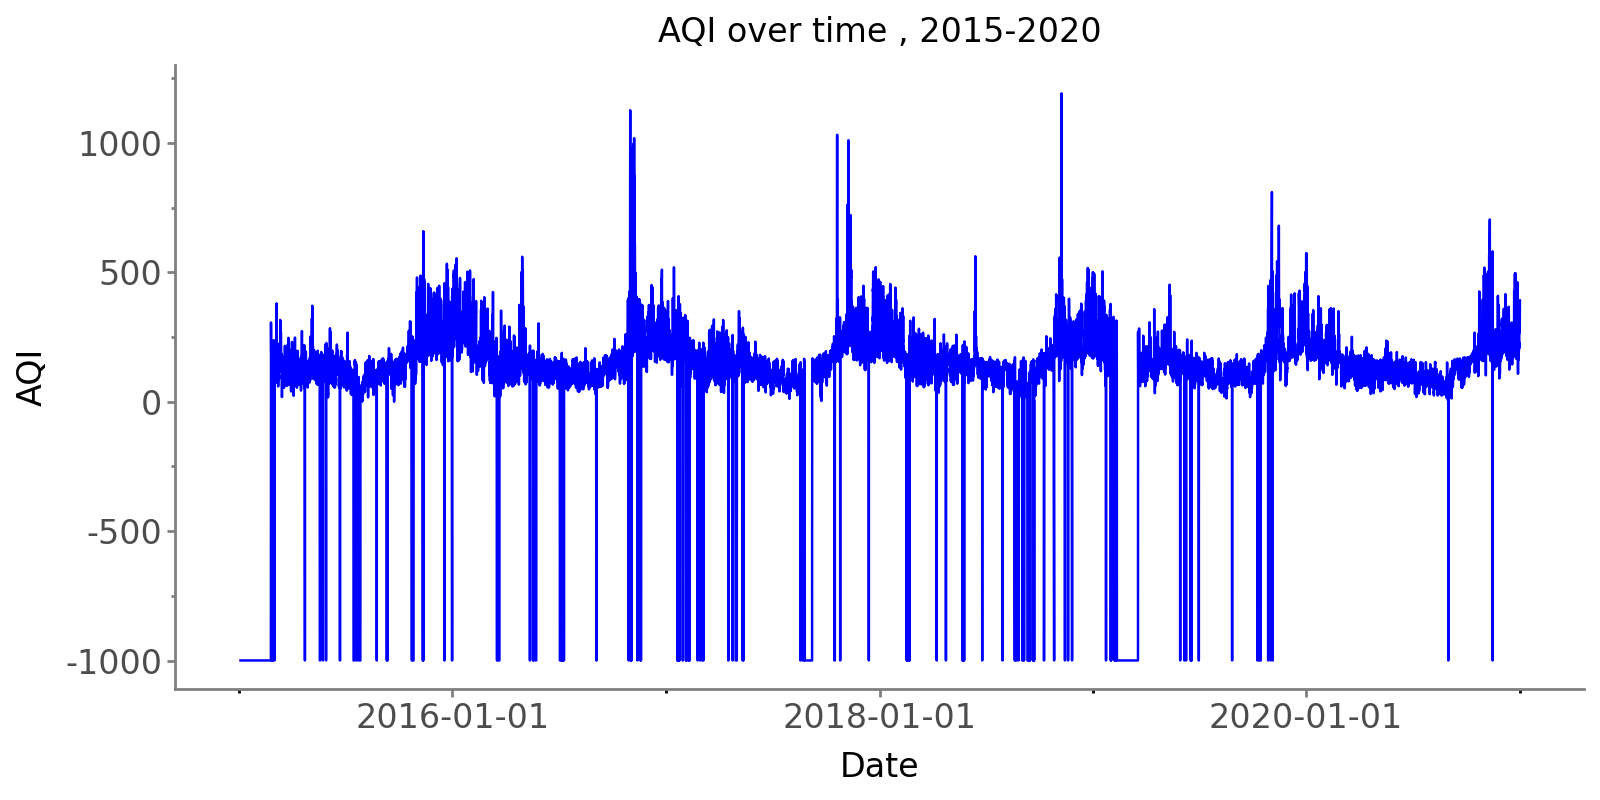

In [46]:


plotnine.options.figure_size = (8,4)
(
    ggplot(df_clean, aes(x='Date', y='AQI'))
    + geom_line(color = 'blue')
    + labs(x='Date', y='AQI')
    + scale_x_date()
    + theme_classic()

      + ggtitle("AQI over time , 2015-2020")
      + theme_classic()
      + theme(axis_line=element_line(color="gray"),
              axis_ticks=element_line(color = "gray"),
              text=element_text(size = 12))
)

## PART 1.6: Interpret Your Chart
What is your chart saying? Is there a pattern to air quality in New Delhi? What is a limitaion of this chart/analysis? Write a few sentences.


# There seems to be a pattern, that on in specific months (approx November, December and January) of the year, AQI is very high. Also, it is implausible to have negative AQI.

# PART 2: RELATIONSHIP BETWEEN TEMPERATURE AND AQI
Let's explore the relationship between air temperature and air quality in New Delhi. We'll make a bar chart with the average AQI for different temperature ranges.


### PART 2.1: Read in New Delhi Temperature Data



Read in the air temperature data into a dataframe and orient to it. We'll be using the average daily temperature field, `TAVG`. The data is available on GitHub at the following link:

```
https://raw.githubusercontent.com/envirodatascience/ENVS-617-Class-Data/main/noaa_new_delhi_temp_15_20.csv
```




In [16]:
df_temp = pd.read_csv('https://raw.githubusercontent.com/envirodatascience/ENVS-617-Class-Data/main/noaa_new_delhi_temp_15_20.csv')
df_temp.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN
0,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2015-01-01,58,NaN,NaN
1,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2015-01-02,58,NaN,NaN
2,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2015-01-03,57,NaN,NaN
3,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2015-01-04,56,NaN,NaN
4,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2015-01-05,55,NaN,NaN


### PART 2.2: Create Clean Daily Summary Table

Ultimately, we want a table with a single air temperature record for New Delhi for each day in the 2015 to 2020 window. (In the next part, we will merge this with the AQI data.) To do this:

* First, answer: how many weather stations do we have data for in New Delhi?

* Then, filter your data to include only the data for the station with the most data records.

* Split out the `DATE` column into separate year, month, and day columns.

* Check that we now only have one data point per day. Check the coverage of the data to make sure we have a fair sample across years and months between 2015 and 2020.

In [17]:
df_temp.STATION.unique()

array(['IN022023000', 'IN022021900'], dtype=object)

There are two weather stations for which we have data.

In [18]:
df_temp.STATION.value_counts()

,count
STATION,
IN022021900,2185
IN022023000,2183


In [19]:
# Filter data for weather station with highest number of records
df_temp_1 = df_temp[df_temp['STATION'] == 'IN022021900']
df_temp_1.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN
2183,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59,71.0,48.0
2184,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-02,58,71.0,50.0
2185,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-03,59,62.0,NaN
2186,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-04,58,66.0,NaN
2187,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-05,57,69.0,46.0


In [20]:
# Check the type of data in DATE column and cast it appropriately
df_temp_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2185 entries, 2183 to 4367
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    2185 non-null   object 
 1   NAME       2185 non-null   object 
 2   LATITUDE   2185 non-null   float64
 3   LONGITUDE  2185 non-null   float64
 4   ELEVATION  2185 non-null   float64
 5   DATE       2185 non-null   object 
 6   TAVG       2185 non-null   int64  
 7   TMAX       1366 non-null   float64
 8   TMIN       1904 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 235.2+ KB


In [21]:
# split date in to Year, Month, Date
df_temp_1['DATE'] = df_temp_1['DATE'].astype('datetime64[ns]')
df_temp_1['Year'] = df_temp_1['DATE'].dt.year
df_temp_1['Month'] = df_temp_1['DATE'].dt.month
df_temp_1['Day'] = df_temp_1['DATE'].dt.day
df_temp_1.head()

<ipython-input-21-471433f47714>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-21-471433f47714>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-21-471433f47714>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-21-471433f47714>

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN,Year,Month,Day
2183,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59,71.0,48.0,2015,1,1
2184,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-02,58,71.0,50.0,2015,1,2
2185,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-03,59,62.0,NaN,2015,1,3
2186,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-04,58,66.0,NaN,2015,1,4
2187,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-05,57,69.0,46.0,2015,1,5


In [22]:
# Check that we now only have one data point per day.
# Check the coverage of the data to make sure we have a fair sample across years and months between 2015 and 2020
df_temp_1.duplicated(subset=['Year', 'Month', 'Day']).sum()

0

In [23]:
df_temp_1.Year.unique()

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=int32)

In [24]:
df_temp_1.Month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [25]:
df_temp_1.Day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int32)

### PART 2.3: Join Temperature and Air Quality Data
Join together the clean hourly AQI data and the filtered daily temperature data:

* Join on year, month, and day.
* Only keep the days where you have a record in both datasets.
* The AQI data is hourly, so you will have ~24 rows per day. This is ok. * Check the shapes of the dataframes before and after the merge.


Hint: You will need to create a key (or keys) with the same format across dataframes.



In [26]:
# Join together the clean hourly AQI data and the filtered daily temperature data:
# Ensure the columns of Year, Month, Day are in same format in both the dataframes
# Join on year, month, and day.
df_clean['Year'] = pd.to_datetime(df_clean['Date (LT)']).dt.year
df_clean['Month'] = pd.to_datetime(df_clean['Date (LT)']).dt.month
df_clean['Day'] = pd.to_datetime(df_clean['Date (LT)']).dt.day


In [27]:
df_temp_1['DATE'] = df_temp_1['DATE'].astype('datetime64[ns]')
df_temp_1['Year'] = df_temp_1['DATE'].dt.year
df_temp_1['Month'] = df_temp_1['DATE'].dt.month
df_temp_1['Day'] = df_temp_1['DATE'].dt.day

<ipython-input-27-714b91cfe5e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-27-714b91cfe5e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-27-714b91cfe5e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-27-714b91cfe5e2>

In [28]:
df_merged = df_clean.merge(df_temp_1, 'left', on=['Year', 'Month', 'Day'])
df_merged.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,...,Date,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN
0,New Delhi,PM2.5 - Principal,2015-01-01 01:00 AM,2015,1,1,1,-999.0,-999,NaN,...,2015-01-01 01:00:00,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59.0,71.0,48.0
1,New Delhi,PM2.5 - Principal,2015-01-01 02:00 AM,2015,1,1,2,-999.0,-999,NaN,...,2015-01-01 02:00:00,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59.0,71.0,48.0
2,New Delhi,PM2.5 - Principal,2015-01-01 03:00 AM,2015,1,1,3,-999.0,-999,NaN,...,2015-01-01 03:00:00,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59.0,71.0,48.0
3,New Delhi,PM2.5 - Principal,2015-01-01 04:00 AM,2015,1,1,4,-999.0,-999,NaN,...,2015-01-01 04:00:00,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59.0,71.0,48.0
4,New Delhi,PM2.5 - Principal,2015-01-01 05:00 AM,2015,1,1,5,-999.0,-999,NaN,...,2015-01-01 05:00:00,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,59.0,71.0,48.0


### PART 2.4: Convert and Bucket Temperature and Aggregate Data

To compare temperature and AQI, we will look at the average hourly AQI for bucketed temperature ranges. To do this, transform the temperature field and summarize the data:

* Let's assume that this chart will be for an audience in India. Convert the temperature data to Celsius.


* Then, create a new column that buckets the temperature values. Create the following buckets (exclusive of the lower boundary, inclusive of the upper boundary)
  * \<10,
  * 10-15
  * 15-20
  * 20-25
  * 25-30
  * 30-35
  * 35-40

* Then, aggregate the data by temperature bucket and calculate a) the mean AQI for that temperature range and b) the standard deviation of the AQI for that temperature range



In [29]:
# Convert the temperature data to Celsius.
df_merged['TAVG'] = (df_merged['TAVG'] - 32) * 5/9
df_merged.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,...,Date,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN
0,New Delhi,PM2.5 - Principal,2015-01-01 01:00 AM,2015,1,1,1,-999.0,-999,NaN,...,2015-01-01 01:00:00,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,15.0,71.0,48.0
1,New Delhi,PM2.5 - Principal,2015-01-01 02:00 AM,2015,1,1,2,-999.0,-999,NaN,...,2015-01-01 02:00:00,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,15.0,71.0,48.0
2,New Delhi,PM2.5 - Principal,2015-01-01 03:00 AM,2015,1,1,3,-999.0,-999,NaN,...,2015-01-01 03:00:00,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,15.0,71.0,48.0
3,New Delhi,PM2.5 - Principal,2015-01-01 04:00 AM,2015,1,1,4,-999.0,-999,NaN,...,2015-01-01 04:00:00,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,15.0,71.0,48.0
4,New Delhi,PM2.5 - Principal,2015-01-01 05:00 AM,2015,1,1,5,-999.0,-999,NaN,...,2015-01-01 05:00:00,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2015-01-01,15.0,71.0,48.0


In [30]:
# create a new column that buckets the temperature values
df_merged['Bucket'] = pd.cut(df_merged['TAVG'], bins=[0, 10, 15, 20, 25, 30, 35, 40],
                             labels=['<10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40'],
                             include_lowest=True, right=True) # include_lowest for <10


In [31]:
df_merged['Bucket'].unique()

['10-15', '<10', '15-20', '20-25', '25-30', '30-35', '35-40', NaN]
Categories (7, object): ['<10' < '10-15' < '15-20' < '20-25' < '25-30' < '30-35' < '35-40']

### PART 2.5: Plot a Bar Chart of Bucketed Temperature vs. AQI

Use `plotnine` to create a bar graph of temperature bucket vs. average hourly AQI in New Delhi:
* Include information about the AQI standard deviation.
* Fine tune the plot to make it as clear as possible.

<ipython-input-56-8406b3a1fa77>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


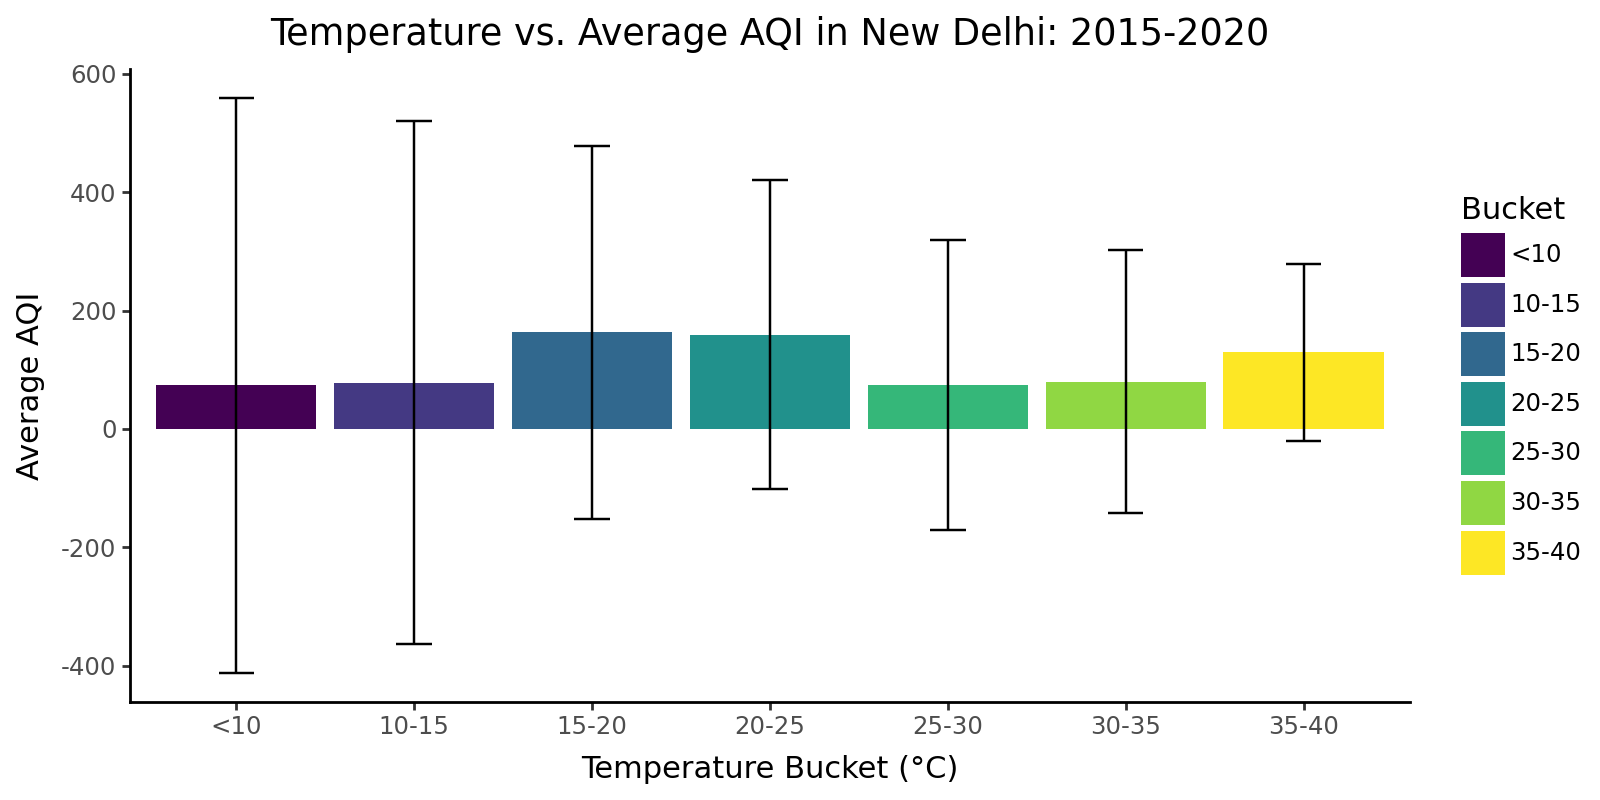

In [56]:
# Ensure TAVG column is numeric and handle missing values
df_merged['TAVG'] = pd.to_numeric(df_merged['TAVG'], errors='coerce')
df_merged = df_merged.dropna(subset=['TAVG'])

# create a new column that buckets the temperature values
df_merged['Bucket'] = pd.cut(df_merged['TAVG'], bins=[0, 10, 15, 20, 25, 30, 35, 40],
                             labels=['<10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40'],
                             include_lowest=True, right=True,
                             duplicates='drop') # include_lowest for <10, drop duplicates

# Use plotnine to create a bar graph of temperature bucket vs. average hourly AQI in New Delh
# Aggregate AQI by Bucket and calculate mean and standard deviation
df_plot = df_merged.groupby('Bucket')['AQI'].agg(['mean', 'std'])
df_plot = df_plot.reset_index()

(    ggplot(df_plot, aes(x='Bucket', y='mean', fill='Bucket'))
    + geom_bar(stat='identity')
    + geom_errorbar(aes(ymin='mean-std', ymax='mean+std'), width=.2, position=position_dodge(width=1))
    + ggtitle("Temperature vs. Average AQI in New Delhi: 2015-2020")
    + labs(x='Temperature Bucket (°C)', y='Average AQI')
    + theme_classic()

)

### PART 2.6: Interpret Your Chart
What is the chart saying? Is there a relationship between air temperature and air quality in New Delhi? What is a limitaion of this chart/analysis?Write a few sentences.

In [33]:
# As per the chart and data plotted, it appears that AQI in Delhi is very high for temperature range when it is between 15-20 and 20-25